In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
df=pd.read_csv("/content/winequality_red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Mean of the features**

In [4]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


**Understanding utility of a feature by sample box plot**

<Axes: title={'center': 'volatile acidity'}, xlabel='quality'>

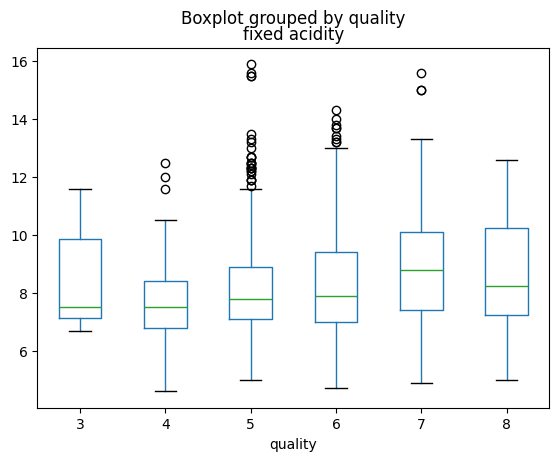

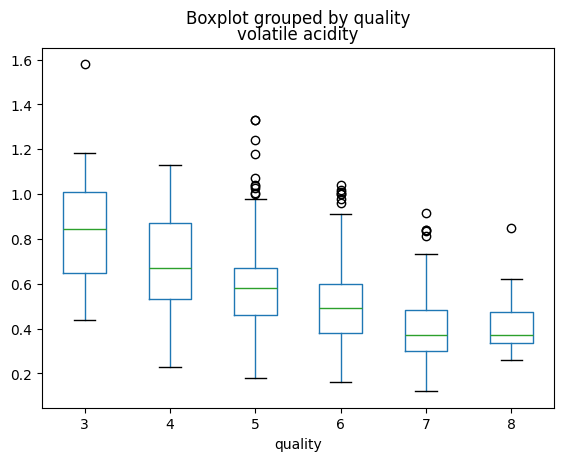

In [5]:
df.boxplot(column='fixed acidity', by='quality', grid=False)
df.boxplot(column='volatile acidity', by='quality', grid=False)

**Regular splitting into train and test**

In [6]:
y=df.iloc[:, 11]
x=df.iloc[:, 0:11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Selecting Features**

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=4)
selector.fit(x_train, y_train)

SelectKBest(k=4)

**Top Feature**

In [9]:
cols=selector.get_support(indices=True)
print(cols)

[ 1  6  9 10]


**Picking subset of training and testing**

In [10]:
x_train_s=x_train.iloc[:, cols]
x_test_s=x_test.iloc[:, cols]

**Traing decision tree with full features**

In [11]:
from sklearn.tree import DecisionTreeClassifier
#Initalize the classifier
clf = DecisionTreeClassifier()
#Fitting the training data
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.69375


**Training decision tree with selected featues**

In [14]:
#Fitting the training data
clf.fit(x_train_s, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test_s)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6375


In [16]:
# Import the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors

# Fit the model to the training data
knn.fit(x_train_s, y_train)

# Calculate and print the accuracy
print('Accuracy = ', knn.score(x_test_s, y_test))

Accuracy =  0.5875
